In [5]:
import numpy as np
import scipy 
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
n_prism = complex(1.531, -0.002)                   # комплексный показатель преломления призмы (Zeonex)
eps_prism = n_prism**2                             # диэлектрическая проницаемость призмы (Zeonex)
eps_air = n = 1                                    # диэлектрическая проницаемость воздуха (1.00027717)
eps_InSb = complex(-17.3, 7.12)                    # InSb на 197мкм из Telegram
wavelength = 197 * 10**(-6)                        # длина волны лазера в метрах
d_gr = 17 * 10**(-9)                               # толщина графеновой плёнки в метрах


# -18.474508935284483+0.006568625288807081j - InSb по Друде-Лоренцу
# угол и зазор подгоняется из условия резонанса, т.к. гониометр и "линейка" неточные (???)
# какая точность нужна для расчётов? 

      gap signal Noise Er_signal sum IMO     Norm  Er_Norm
0     -32     39    -8         1  10  46  0.27976  0.01399
1   -15.4     37    -8         1  10  46  0.26786  0.01339
2     1.2     34    -8         1  10  46     0.25   0.0125
3    17.8     31    -8         1  10  46  0.23214  0.01161
4    34.4     28    -8         1  10  46  0.21429  0.01071
5    42.7     26    -8         1  10  46  0.20238  0.01012
6      51     21    -8         1  10  46  0.17262  0.00863
7    59.3     18    -8         1  10  46  0.15476  0.00774
8    67.6     15    -8         1  10  46   0.1369  0.00685
9    75.9     14    -8         1  10  46  0.13095  0.00655
10   84.2     13    -8         1  10  46    0.125  0.00625
11   92.5     12    -8         1  10  46  0.11905  0.00595
12  100.8     14    -8         1  10  46  0.13095  0.00655
13  109.1     16    -8         1  10  46  0.14286  0.00714
14  117.4     21    -8         1  10  46  0.17262  0.00863
15  125.7     25    -8         1  10  46  0.19643  0.009

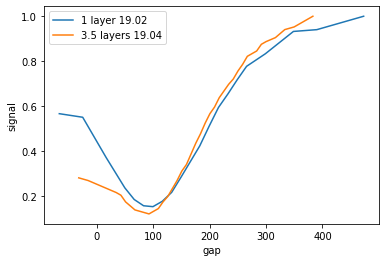

In [34]:
data_3_5 =  pd.read_csv(r"C:\Users\belco\Documents\Graphene\Graphene-films-plasmon-refractometry\Data\Data_many_layers\layers_3_5_table.csv")   #3.5 слоя графена
print(data_3_5)
data_1 = pd.read_csv(r"C:\Users\belco\Documents\Graphene\Graphene-films-plasmon-refractometry\Data\Data_many_layers\layer_1_table.csv")         #1 слой
plt.xlabel('gap')
plt.ylabel('signal')
x_1l = pd.to_numeric((data_1['gap'][3:]))
y_1l = pd.to_numeric((data_1['Norm'][3:]))
plt.plot(x_1l, y_1l, label = '1 layer 19.02')
x_3_5 = pd.to_numeric((data_3_5['gap'][:42]))
y_3_5 = pd.to_numeric((data_3_5['Norm'][:42]))
plt.plot(x_3_5, y_3_5, label = '3.5 layers 19.04')
plt.legend()
plt.show()

<class 'pandas.core.series.Series'>


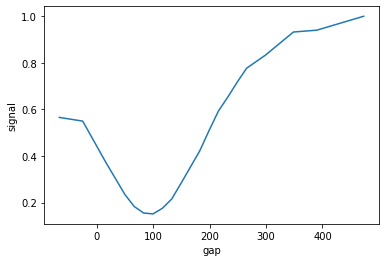

In [30]:
data_1 = pd.read_csv(r"C:\Users\belco\Documents\Graphene\Graphene-films-plasmon-refractometry\Data\Data_many_layers\layer_1_table.csv")         #1 слой
x_1l = pd.to_numeric((data_1['gap'][3:]))
y_1l = pd.to_numeric((data_1['Norm'][3:]))
plt.plot(x_1l, y_1l, label = '1 layer 19.02')
plt.xlabel('gap')
plt.ylabel('signal')
#plt.xticks(np.linspace(-32, 200, 10))
#plt.yticks(0, 1, 3)
plt.legend()
plt.show()

In [ ]:
"""
#file_3_5 = open(r"C:\Users\belco\Documents\Graphene\Graphene-films-plasmon-refractometry\Data\Data_many_layers\3.5_layers_table.csv", "r").read()  # файлы из телеги, 
#file_1 = open(r"R(gap)_InSb+Graphene.txt", "r").read() # они перепутаны!
def string_to_np_array(input_string):
    divisions = input_string.split('\n')
    result_2d_list = np.array([list(map(float, division.split('\t'))) for division in divisions])
    return result_2d_list


#file1 = string_to_np_array(file1) 
#file2 = string_to_np_array(file2)



#column = file2[::, 1:2:]
#Data = string_to_np_array(file1)[::, :2:]
#Data = np.append (file, column,  axis= 1 )
"""


[0.46667 0.42745 0.36863 0.36471 0.32157 0.2     0.16471 0.07843 0.0902
 0.1098  0.21569 0.2549  0.35294 0.49804 0.58039 0.69412 0.78039 0.92157
 1.      0.96078 1.      1.     ]


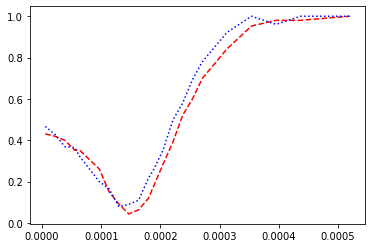

[5.400e-06 2.200e-05 3.860e-05 5.520e-05 6.350e-05 9.670e-05 1.133e-04
 1.299e-04 1.465e-04 1.631e-04 1.797e-04 1.880e-04 2.046e-04 2.212e-04
 2.378e-04 2.544e-04 2.710e-04 3.125e-04 3.540e-04 3.955e-04 4.370e-04
 5.200e-04]


In [26]:
"""d_2 = file1[::, 0]*10**(-6) #из мкм в м
R_In = file2[::, 1] # названия файлов перепутаны
err_In = file2[::, 2]
R_Gr = file1[::, 1]
err_Gr = file1[::, 2]""""Orientation (checkpoints history)"

d

#noise_Gr = 9 зачем?

plt.plot(d_2, R_In, '--r') #график экспериментальных данных для проверки
plt.plot(d_2, R_Gr, ':b')

d_min = d_2[19] #экспериментальный минимум
print(R_Gr)
plt.show()
print(d_2)

In [20]:
""""def reflect3(d):  #угол не подгоняется
    
    kz_1=np.sqrt(eps_1)*np.cos(teta)
    kz_2=np.sqrt(eps_2-eps_1*np.sin(teta)**2)
    kz_3=np.sqrt(eps_4-eps_1*np.sin(teta)**2)
    
#Коэффициенты отражения
    r_12=(eps_2*kz_1-eps_1*kz_2)/(eps_2*kz_1+eps_1*kz_2)
    r_23=(eps_4*kz_2-eps_2*kz_3)/(eps_4*kz_2+eps_2*kz_3)

#Коэффициенты пропускания
    t_12=2*kz_1*np.sqrt(eps_1*eps_2)/(eps_2*kz_1+eps_1*kz_2) #???
    t_23=2*kz_2*np.sqrt(eps_2*eps_4)/(eps_4*kz_2+eps_2*kz_3)
   
 #Матрица пропускания
    S1=np.array([[1/t_12, r_12/t_12], [r_12/t_12, 1/t_12]])    
    
#Расчёт R    
    R = []
    for j in range(len(d)):   #1:1:length(d_2)
        S2=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d[j])/t_23, 
         r_23*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d[j])/t_23],  
         [r_23*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d[j])/t_23, 
         np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d[j])/t_23]])
        S=S1@S2
        R += [abs(S[1][0]/S[0][0])]
    print(S)
    return(np.array(R))
"""

#угол подгоняется по InSb, код Герасимова
def reflect3(d, angle):
    
    kz_1=np.sqrt(eps_1)*np.cos(angle)
    kz_2=np.sqrt(eps_2-eps_1*np.sin(angle)**2)
    kz_3=np.sqrt(eps_4-eps_1*np.sin(angle)**2)
    
#Коэффициенты отражения
    r_12=(eps_2*kz_1-eps_1*kz_2)/(eps_2*kz_1+eps_1*kz_2)
    r_23=(eps_4*kz_2-eps_2*kz_3)/(eps_4*kz_2+eps_2*kz_3)

#Коэффициенты пропускания
    t_12=2*kz_1*np.sqrt(eps_1*eps_2)/(eps_2*kz_1+eps_1*kz_2) #???
    t_23=2*kz_2*np.sqrt(eps_2*eps_4)/(eps_4*kz_2+eps_2*kz_3)
   
 #Матрица пропускания
    S1=np.array([[1/t_12, r_12/t_12], [r_12/t_12, 1/t_12]])    
    
#Расчёт R    
    R = []
    for j in range(len(d)):   #1:1:length(d_2)
        S2=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, r_23*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23],  [r_23*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23]])
        S=S1@S2
        R += [abs(S[1][0]/S[0][0])]
    return(np.array(R))



In [21]:
#teta = 0.7291350762966604 #из предыдущего файла
#teta = scipy.optimize.curve_fit(reflect3, d_2, R_In, bounds = (0.65, 0.75))[0][0] подгонка угла по In по всему диапазону
teta = scipy.optimize.curve_fit(reflect3, d_2[4:11], R_In[4:11], bounds = (0.65, 0.75))[0][0] #подгонка угла по In только по окрестности минимума
print(teta*180/np.pi) #угол в градусах
#reflect3(d_2, teta)
#print(scipy.optimize.curve_fit(reflect4, d_2, R_Gr))

#eps_3 = complex(*scipy.optimize.curve_fit(reflect4, d_2, R_Gr)[0])

41.7133002363708


In [22]:
#код Герасимова 
def reflect4(d_2, e3_re, e3_im):
    eps_3 = complex(e3_re, e3_im) # моя вставка
    kz_1=np.sqrt(eps_1)*np.cos(teta)
    kz_2=np.sqrt(eps_2-eps_1*np.sin(teta)**2)
    kz_3=np.sqrt(eps_3-eps_1*np.sin(teta)**2)
    kz_4=np.sqrt(eps_4-eps_1*np.sin(teta)**2)


#Коэффициенты отражения
    r_12=(eps_2*kz_1-eps_1*kz_2)/(eps_2*kz_1+eps_1*kz_2)
    r_23=(eps_3*kz_2-eps_2*kz_3)/(eps_3*kz_2+eps_2*kz_3)
    r_34=(eps_4*kz_3-eps_3*kz_4)/(eps_4*kz_3+eps_3*kz_4)

#Коэффициенты пропускания
    t_12=2*kz_1*np.sqrt(eps_1*eps_2)/(eps_2*kz_1+eps_1*kz_2)
    t_23=2*kz_2*np.sqrt(eps_2*eps_3)/(eps_3*kz_2+eps_2*kz_3)
    t_34=2*kz_3*np.sqrt(eps_3*eps_4)/(eps_4*kz_3+eps_3*kz_4)

#Матрица преобразования
    S1=np.array([[1/t_12, r_12/t_12], [r_12/t_12, 1/t_12]])
    S3=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34,
     r_34*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34],
     [r_34*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34, 
     np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34]])
    
    R = []
    for j in range(len(d_2)):   #1:1:length(d_2)
        S2=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, r_23*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23],  [r_23*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23]])
        S=S1@S2@S3
        R += [abs(S[1][0]/S[0][0])]
    
    return np.array(R)

In [13]:
%history -n -o -p -g -f ori_hist_2 # записать историю в файл

File 'ori_hist_2' exists. Overwrite? no
Aborting.


In [14]:
pwd

'C:\\Users\\belco\\Documents\\Graphene'

In [68]:
# ячейка, которая считает Re и Im eps_3


##delta = d_2[np.argsort(R_In)[0]]-d_2[np.argsort(reflect3(d_2, teta))[0]] #поправка на смещение нуля d, она оказалась = 0 после подгонки по углу, что логично (иначе невязка растёт)
##print(delta)
opt = scipy.optimize.curve_fit(reflect4, d_2[5:12], R_Gr[5:12], sigma = err_Gr[5:12], bounds = ([200, 200], [400, 400]), full_output = True, method = "trf")
print(scipy.optimize.curve_fit(reflect4, d_2[5:12], R_Gr[5:12], sigma = err_Gr[5:12], bounds = ([200, 200], [400, 400]), full_output = True, method = "trf"))
#print(scipy.optimize.curve_fit(reflect4, d_2[5:12], R_Gr[5:12], sigma = err_Gr[5:12],  full_output = True, method = "trf"))
##print(scipy.optimize.curve_fit(reflect4, d_2[5:], R_Gr[5:], p0 = [-100, 300], sigma = err_Gr[5:],  bounds = ([-1000, 0], [-1, 10000]), full_output = True, method = "trf"))

eps_3 = complex(*scipy.optimize.curve_fit(reflect4, d_2[5:12], R_Gr[5:12], sigma = err_Gr[5:12], bounds = ([200, 200], [400, 400]))[0]) #оптимизация eps_3
print(eps_3)
eps_3 = complex(-1, 261)

#To compute one standard deviation errors on the parameters, use perr = np.sqrt(np.diag(pcov))
print(np.sqrt(np.diag(opt[1])))

(array([256.08480343, 267.80733152]), array([[ 47045.24804966, -35765.88836832],
       [-35765.88836832,  66299.52271483]]), {'nfev': 14, 'fvec': array([16.2464279 ,  8.46201779,  5.82823383, -3.99243335, 16.61367693,
       10.58055248, 10.55610039])}, '`ftol` termination condition is satisfied.', 2)
(256.08480343068857+267.8073315219902j)
[216.89916563 257.48693698]


0.0
[5.400e-06 2.200e-05 3.860e-05 5.520e-05 6.350e-05 9.670e-05 1.133e-04
 1.299e-04 1.465e-04 1.631e-04 1.797e-04 1.880e-04 2.046e-04 2.212e-04
 2.378e-04 2.544e-04 2.710e-04 3.125e-04 3.540e-04 3.955e-04 4.370e-04
 5.200e-04]


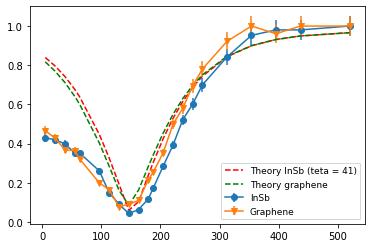

In [63]:
"""#print(reflect3(d))



plt.plot((d_2+delta)*10**6, reflect3(d_2, teta), '--r', label = 'Theory InSb (teta = 41)')
#plt.plot((d_2)*10**6, reflect3(d_2, teta), '--r', label = 'Theory InSb (teta = 41)')


#plt.plot(d_2*10**6, R_In, 'vr', label = 'InSb')
plt.errorbar(d_2*10**6, R_In, yerr = err_In, marker = 'o', label = 'InSb')

#plt.plot(d_2*10**6, R_Gr, 'vg', label = 'Graphene')
plt.errorbar(d_2*10**6, R_Gr, yerr = err_Gr, marker = 'v', label = 'Graphene')

plt.plot((d_2+delta)*10**6, reflect4(d_2, eps_3.real, eps_3.imag), '--g', label = 'Theory graphene')
#plt.plot((d_2)*10**6, reflect4(d_2, eps_3.real, eps_3.imag), '--g', label = 'Theory graphene')

#plt.errorbar(d_2, R_In, yerr = , marker='o', linestyle='none',
#    ecolor='k', elinewidth=0.8, capsize=4, capthick=1)
print(d_2)
plt.legend(fontsize=9)
plt.show()
#print(np.argsort(reflect3(d_2, teta)))"""
#print(reflect3(d))
delta = d_2[np.argsort(R_In)[0]]-d_2[np.argsort(reflect3(d_2, teta))[0]]
print(delta)

plt.plot((d_2+delta)*10**6, reflect3(d_2, teta), '--r', label = 'Theory InSb (teta = 41)')
#plt.plot((d_2)*10**6, reflect3(d_2, teta), '--r', label = 'Theory InSb (teta = 41)')


#plt.plot(d_2*10**6, R_In, 'vr', label = 'InSb')
plt.errorbar(d_2*10**6, R_In, yerr = err_In, marker = 'o', label = 'InSb')

#plt.plot(d_2*10**6, R_Gr, 'vg', label = 'Graphene')
plt.errorbar(d_2*10**6, R_Gr, yerr = err_Gr, marker = 'v', label = 'Graphene')

plt.plot((d_2+delta)*10**6, reflect4(d_2, eps_3.real, eps_3.imag), '--g', label = 'Theory graphene')
#plt.plot((d_2)*10**6, reflect4(d_2, eps_3.real, eps_3.imag), '--g', label = 'Theory graphene')

#plt.errorbar(d_2, R_In, yerr = , marker='o', linestyle='none',
#    ecolor='k', elinewidth=0.8, capsize=4, capthick=1)
print(d_2)
plt.legend(fontsize=9)
plt.show()
#print(np.argsort(reflect3(d_2, teta)))


C:\Users\belco\AppData\Local\Temp\ipykernel_16712\4102653590.py:21: RuntimeWarning: divide by zero encountered in cdouble_scalars
  S3=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34,
C:\Users\belco\AppData\Local\Temp\ipykernel_16712\4102653590.py:22: RuntimeWarning: divide by zero encountered in cdouble_scalars
  r_34*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34],
C:\Users\belco\AppData\Local\Temp\ipykernel_16712\4102653590.py:23: RuntimeWarning: divide by zero encountered in cdouble_scalars
  [r_34*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34,
C:\Users\belco\AppData\Local\Temp\ipykernel_16712\4102653590.py:24: RuntimeWarning: divide by zero encountered in cdouble_scalars
  np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34]])
C:\Users\belco\AppData\Local\Temp\ipykernel_16712\4102653590.py:28: RuntimeWarning: divide by zero encountered in cdouble_scalars
  S2=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, r_

884.853836607964


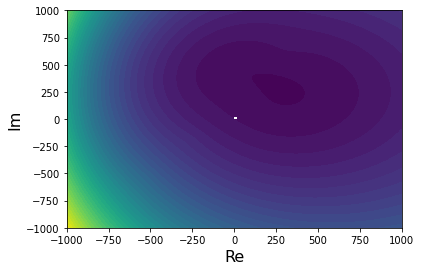

In [65]:
# невязка без функции optimize curve
"""a = []
b = []
c = []

for i in range(100):
    b.append(sum(scipy.optimize.curve_fit(reflect4, d_2, R_Gr, 
       bounds = ([200-(i+1)*10, 0], [200-i, 1000]), method = "trf", full_output=True)[2]['fvec']))  """ 

def residue(d_2, R_Gr, re, im):
    return sum((reflect4(d_2[5:12], re, im)-R_Gr[5:12])**2/err_Gr[5:12]**2 ) #не напутать глобальные и локальные
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1, projection='3d')

x, y = np.meshgrid(np.linspace(-1000, 1000, 100), np.linspace(-1000, 1000, 100))
z = x+y

for i in range(100):
    for j in range(100):
        #z[i][j] = sum(scipy.optimize.curve_fit(reflect4, d_2, R_Gr, 
         #bounds = ([-1000+i*10, -1000+j*10], [-1000+(i+1)*10, -1000+(j+1)*10]), method = "trf", full_output=True)[2]['fvec']) 
        z[i][j] = residue(d_2, R_Gr, -1000+i*20, -1000+j*20)

#C = plt.contour(X,Y,f(X,Y),8,colors='black')
plt.contourf(x, y, z, levels = 50)
plt.xlabel('Re', fontsize=16)
plt.ylabel('Im', fontsize=16)
print(residue(d_2, R_Gr, 256, 268))

plt.show()

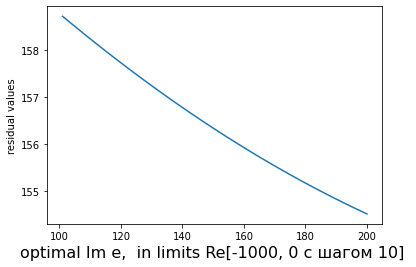

In [48]:
#print(sum(scipy.optimize.curve_fit(reflect4, d_2, R_Gr, bounds = ([-(2+1)*10, 0], [-2*10, 1000]), method = "trf", full_output=True)[2]['fvec']))
a = []
b = []
c = []
for i in range(100):
 #   for j in range(100):
        a.append( scipy.optimize.curve_fit(reflect4, d_2, R_Gr, sigma = err_Gr, bounds = ([200-(i+1)*10, 299], [200-i, 300]), method = "trf")[0][0])
        #c.append( scipy.optimize.curve_fit(reflect4, d_2, R_Gr, sigma = err_Gr, bounds = ([-(i+1)*10, j*10], [-i, (j+1)*10]), method = "trf")[0][1])
        b.append(sum(scipy.optimize.curve_fit(reflect4, d_2, R_Gr, sigma = err_Gr, bounds = ([200-(i+1)*10, 299], [200-i, 300]), method = "trf", full_output=True)[2]['fvec']))     
#eps_3 = complex(*scipy.optimize.curve_fit(reflect4, d_2[5:12], R_Gr[5:12])[0])
#eps_3
a = np.array(a)
b = np.array(b)
c = np.array(c)

plt.plot(a, b)
plt.xlabel('optimal Im e,  in limits Re[-1000, 0 с шагом 10] ', fontsize=16)
plt.ylabel('residual values')
plt.show()

"""fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')


ax.plot_surface(a, c, b)"""

plt.show()


In [17]:
d_2_axis = (d_2+delta)*10**6
r4_axis = reflect4(d_2, eps_3.real, eps_3.imag)
r3_axis = reflect3(d_2, teta)
print(zip(d_2_axis, r4_axis, r3_axis))
export = open('export.txt', 'w')
for line in zip(d_2_axis, r4_axis, r3_axis):
    export.write(str(line)+'\n')
export.close()
delta

NameError: name 'delta' is not defined

In [25]:
reflect4(d_2, 1, 1)

array([0.83845233, 0.7948512 , 0.74106703, 0.67505015, 0.63680683,
       0.44431313, 0.32395124, 0.19066517, 0.05626477, 0.10706511,
       0.24322273, 0.30828559, 0.42781319, 0.53097529, 0.61737886,
       0.68825525, 0.74560914, 0.84390821, 0.89974454, 0.93151833,
       0.94972699, 0.96631369])

In [26]:
R = []
for j in range(len(d_2)):   #1:1:length(d_2)
    S2=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, r_23*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23],  [r_23*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23]])
    S=S1@S2@S3
    R += [abs(S[1][0]/S[0][0])]


plt.plot((d_2-d_3)*10**6, R)


#Data=np.array([(d_2-d_3)*10**6, R])



NameError: name 'kz_2' is not defined

In [90]:
inc_angle = 40*2*math.pi/360
angle = np.pi/4-np.arcsin(np.sin(np.pi/4-inc_angle)/np.sqrt(e1))
e1 = 1
e2 = 1

w_len = 197*pow(10, -6)
def kx(e3):
    return 2*np.pi/w_len/np.sqrt(e2)*np.sqrt(e2*e3/(e2+e3))

def kz1(e3):
    return kx(e3)*np.sqrt(e1-e1*pow(np.sin(angle), 2))

def kz2(e3):
    return kx(e3)*np.sqrt(e2-e1*pow(np.sin(angle), 2))

def kz3(e3):
    return kx(e3)*np.sqrt(e3-e1*pow(np.sin(angle), 2))

def optim(e3):
    return abs(d  + 0.5*kz2*complex(0, 1) * np.log(-(kz1-e1*kz2)(kz2*e3+kz3(e3))/(kz2*e3-kz3(e3))/(kz1+e1*kz2)  ))



NameError: name 'e1' is not defined

In [152]:
""""#Параметры InSb в модели Друде Лоренца
wp=0.578*10**14 #плазменная частота (рад/с)
gp=1/5.16*10**3  #частота столкновений (рад/с)
wl=3.4*10**13 #частота Лоренца (рад/с)
gl=1/3*10**12 #Лоренцева частота столкновений (рад/с)
Al=2.02 #Амплитуда в модели Лоренца
eps0=15.86 #диэлектрическая проницаемость на бесконечности

wavelength=197*10**(-6)  #длина волны излучения
f=3*10**8/wavelength  #частота излучения
w=6.28*f  #круговая частота

#Модель Друде-Лоренца для проницаемости InSb
eps_4=eps0-wp**2/complex(w**2, gp*w)+Al*wl**2/complex(wl**2-w**2, -gl*w) 
print(eps_4)
d_2=np.linspace(0*10**(-6), 450*10**(-6), 450)  #величина зазора между призмой и InSb
d_3=4.7*10**(-6) 
teta=42.21*np.pi/180  #угол падения в призме

# f=1.5*10**12:0.01*10**12:2*10**12 
# w=6.28*f 
# 
# #Модель Друде-Лоренца для проницаемости InSb
# for j=1:1:length(w)
#     eps(j)=eps0-wp**2/(w(j)**2+i*gp*w(j))+Al*wl**2/(wl**2-w(j)**2-i*gl*w(j)) 
# end 
# plot (f, real(eps), f, imag(eps)) """"""

Help on class complex in module builtins:

class complex(object)
 |  complex(real=0, imag=0)
 |  
 |  Create a complex number from a real part and an optional imaginary part.
 |  
 |  This is equivalent to (real + imag*1j) where imag defaults to 0.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      True if self else False
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Convert to a string according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.